### Importing Cleaning the Datasetand Intial EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
df['depth']

0        62.1
1        60.8
2        62.2
3        61.6
4        60.4
         ... 
26962    62.3
26963    61.9
26964    61.7
26965    61.8
26966    62.0
Name: depth, Length: 26967, dtype: float64

In [8]:
df['depth'].median()

61.8

In [9]:
df['depth'].mean()

61.74514655500572

In [10]:
#  outliers are not present in depth

In [11]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

{'whiskers': [<matplotlib.lines.Line2D at 0x2d1c5f49ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d1c5f4a410>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d1c5f49c30>],
 'medians': [<matplotlib.lines.Line2D at 0x2d1c5f4a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d1c5f4abf0>],
 'means': []}

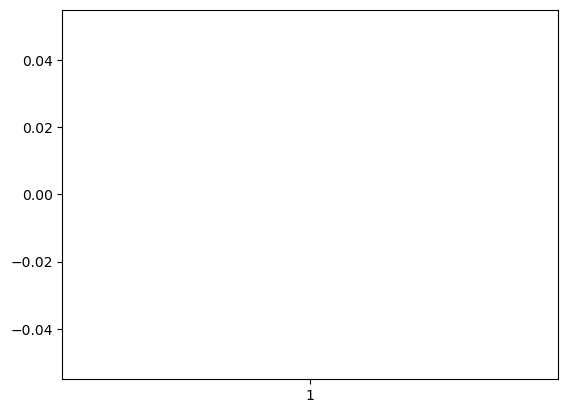

In [ ]:
plt.boxplot(x=df['depth'])

In [ ]:
df['depth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26967 entries, 0 to 26966
Series name: depth
Non-Null Count  Dtype  
--------------  -----  
26270 non-null  float64
dtypes: float64(1)
memory usage: 210.8 KB


In [13]:
import seaborn as sns

<Axes: >

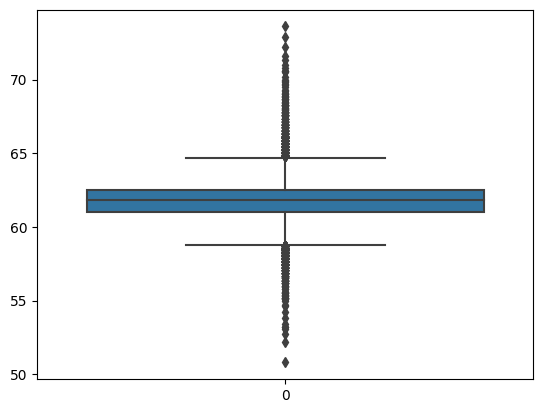

In [14]:
sns.boxplot(df['depth'])

In [15]:
df['depth'][df['depth'] > 66]

14       66.2
100      66.8
174      68.3
177      66.5
428      70.6
         ... 
25862    72.9
25883    72.2
26401    66.9
26573    70.8
26925    66.2
Name: depth, Length: 178, dtype: float64

### outliers are presnt in depth

In [16]:
df['depth'].fillna(df['depth'].median() ,inplace = True)
# Here imputating with median as outliers are present

In [17]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [20]:
df.shape

(26967, 11)

In [21]:
df.drop('Unnamed: 0',inplace = True,axis = 1)

In [22]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [23]:
df.loc[df['x'] == 0,'x'] = df['x'].median()
#  Finding cases where 

In [24]:
df.loc[df['y'] == 0,'y'] = df['y'].median()
df.loc[df['z'] == 0,'z'] = df['z'].median()

In [25]:
df.loc[df['z'] == 0,'z']

Series([], Name: z, dtype: float64)

In [26]:
df['z'].median()

3.52

In [27]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.730487,5.734204,3.539232,3939.518115
std,0.477745,1.394509,2.232068,1.126897,1.164488,0.717718,4024.864666
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### EDA 

## Carat

NameError: name 'plt' is not defined

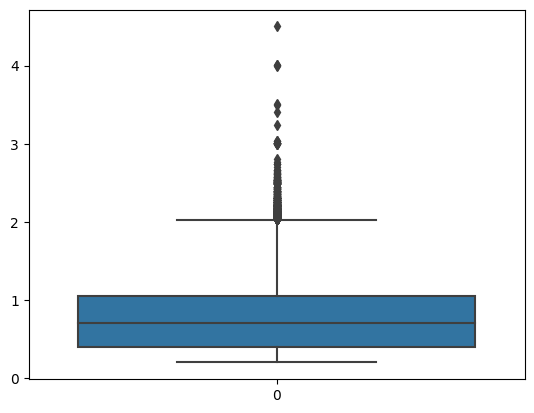

In [28]:
# Univariate analysis
sns.boxplot(df['carat'])
plt.show()

In [29]:
df.loc[df['carat'] > 2,'carat']
# There are 975 outliers present in carat Nope further analyse

79       2.16
119      2.02
124      2.80
135      2.20
204      2.01
         ... 
26745    2.01
26845    2.23
26869    3.24
26924    2.03
26957    2.09
Name: carat, Length: 975, dtype: float64

In [30]:
Q1 = df['carat'].quantile(0.25)
Q1

0.4

In [31]:
Q3 = df['carat'].quantile(0.75)
Q3

1.05

In [32]:
IQR  = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [33]:
print(lower_range)
print(upper_range)

-0.5750000000000001
2.0250000000000004


In [34]:
df.loc[df['carat'] < lower_range,'carat']

Series([], Name: carat, dtype: float64)

In [35]:
df.loc[df['carat'] > upper_range,'carat']
# 662 are outliers

79       2.16
124      2.80
135      2.20
263      2.11
281      2.11
         ... 
26680    2.21
26845    2.23
26869    3.24
26924    2.03
26957    2.09
Name: carat, Length: 662, dtype: float64

### Cut 

In [36]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
df['']
# Find out the percentage of outliers in the dataset per column
#  Create a function too automate it and then loop through the entire list of columns
# Decide whether to impute or have a ceiling in this case celing would be prefereed as the number 
# of data points are very less for eg 200 M data points then 5 % removing allowed  but incase of 400 
# data points even 5 % is too much
# Celing should be used 

In [37]:
print('I changed something')

I changed something
